**Netflix Movies and TV Shows — Exploratory Data Analysis (EDA) and Visualization Using Python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = '#00000000'

In [4]:
#loading the dataset
netflix_df = pd.read_csv("/content/netflix_titles.csv")

In [5]:
##Data with missing value
print(netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1))

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [6]:
##Handling missing value
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)


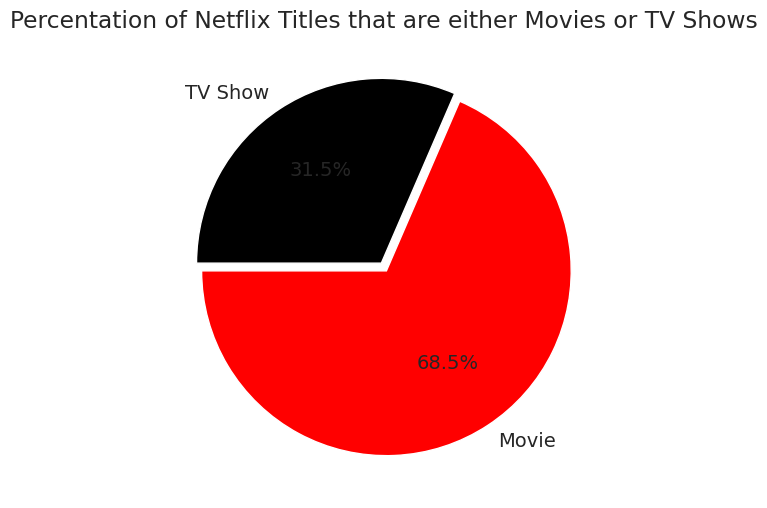

In [7]:
#1. Netflix Content By Type
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

So there are about 4,000++ movies and almost 2,000 TV shows, with movies being the majority. There are far more movie titles (68,5%) that TV shows titles (31,5%) in terms of title.

<ipython-input-9-1243468bf438>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
<ipython-input-9-1243468bf438>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year


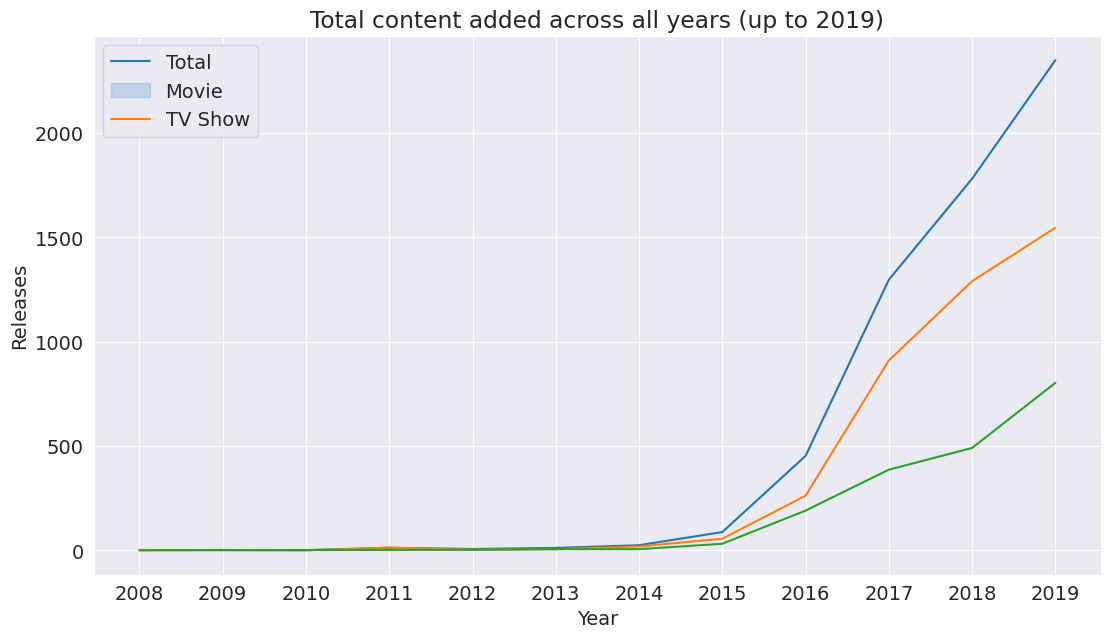

In [9]:
#2. Amount of Content as a Function of Time
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

netflix_year_df = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]

movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]

fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()


Based on the timeline above, we can conclude that the popular streaming platform started gaining traction after 2013. Since then, the amount of content added has been increasing significantly. The growth in the number of movies on Netflix is much higher than that on TV shows. About 1,300 new movies were added in both 2018 and 2019. Besides, we can know that Netflix has increasingly focused on movies rather than TV shows in recent years

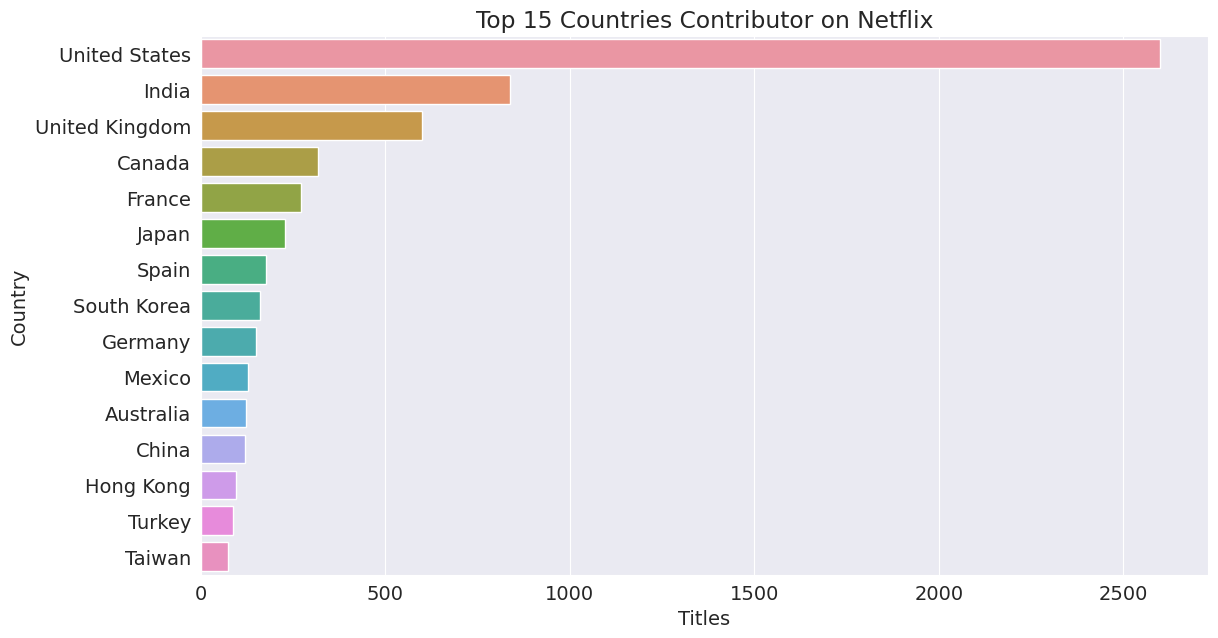

In [10]:
#3. Countries by the Amount of the Produces Content
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

From the images above, we can see the top 15 countries contributor to Netflix. The country by the amount of the produces content is the United States.

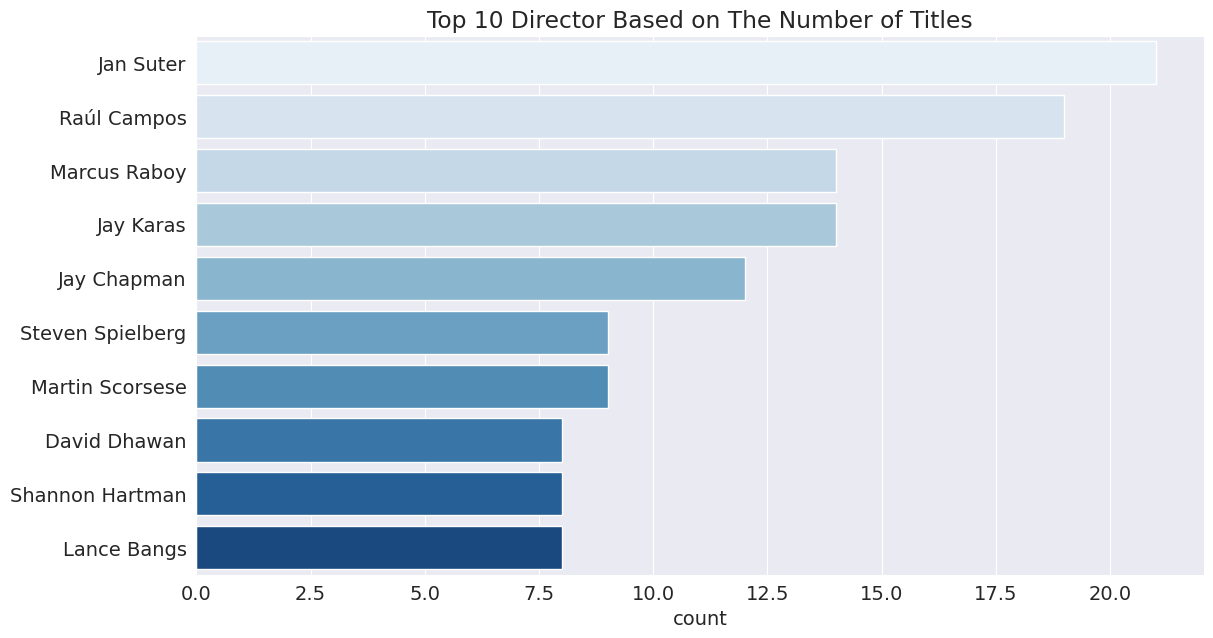

In [11]:
#4. Top Directors on Netflix
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

The most popular director on Netflix, with the most titles, is mainly international.

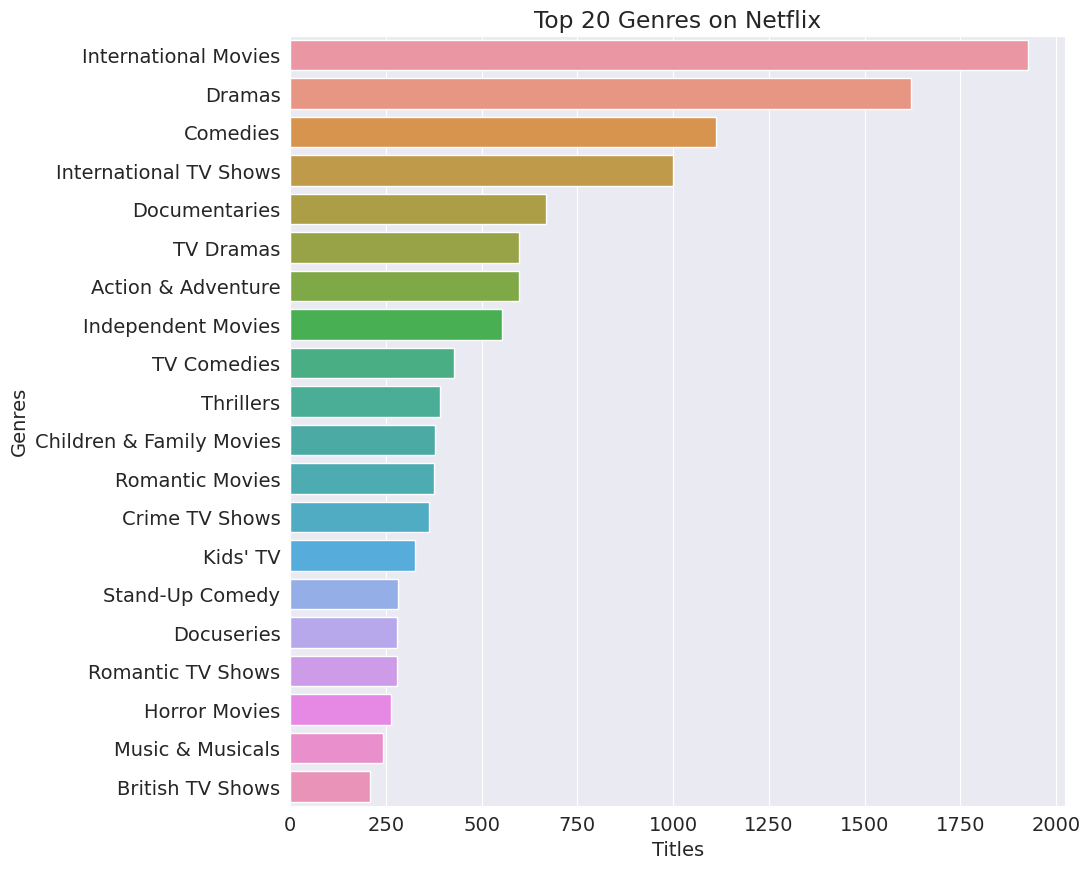

In [13]:
#5. Top Genres on Netflix
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the graph, we know that International Movies take the first place, followed by dramas and comedies.

<ipython-input-14-8d7a313465a1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)


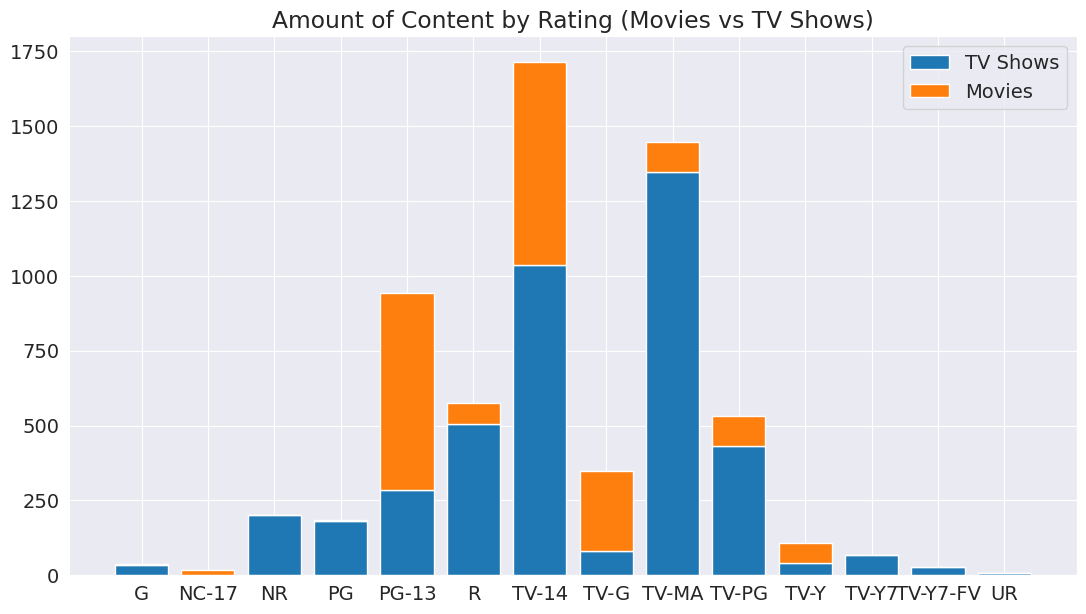

In [14]:
#6. Amount of Content By Rating
order = netflix_df.rating.unique()
count_movies = netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_shows = netflix_shows_df.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
count_shows.sort_values(by="rating", ascending=True)
plt.figure(figsize=(13,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
plt.bar(count_movies.rating, count_shows.title, bottom=count_movies.title)
plt.legend(['TV Shows', 'Movies'])
plt.show()

The largest count of Netflix content is made with a “TV-14” rating. “TV-14” contains material that parents or adult guardians may find unsuitable for children under the age of 14. But the largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.



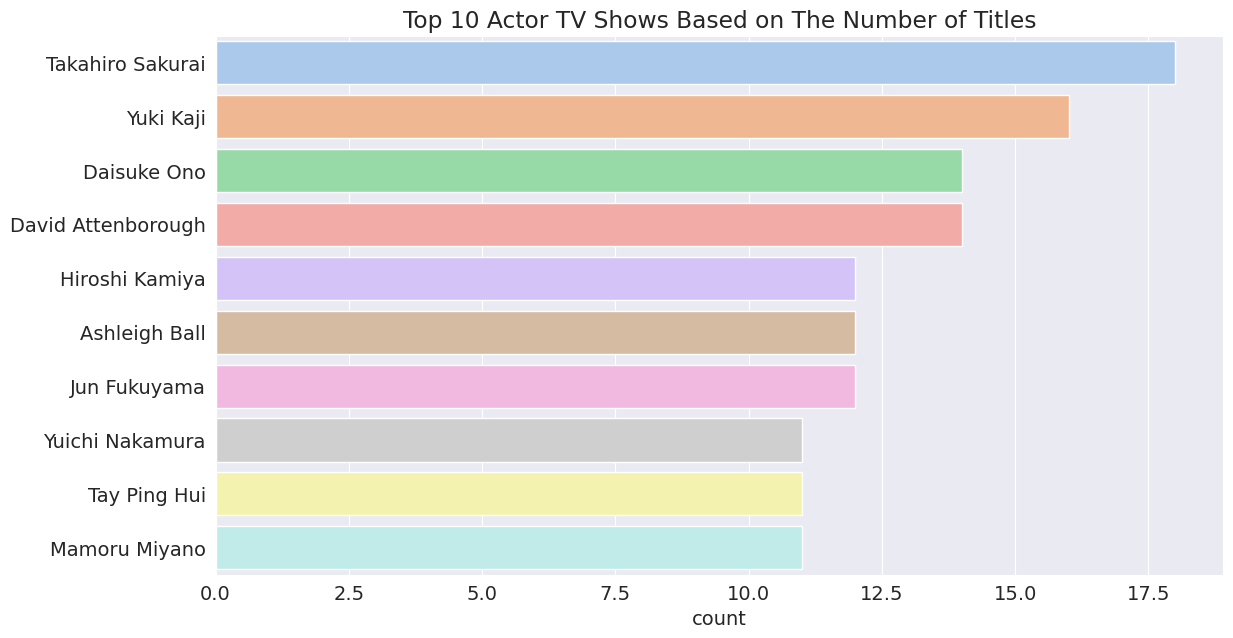

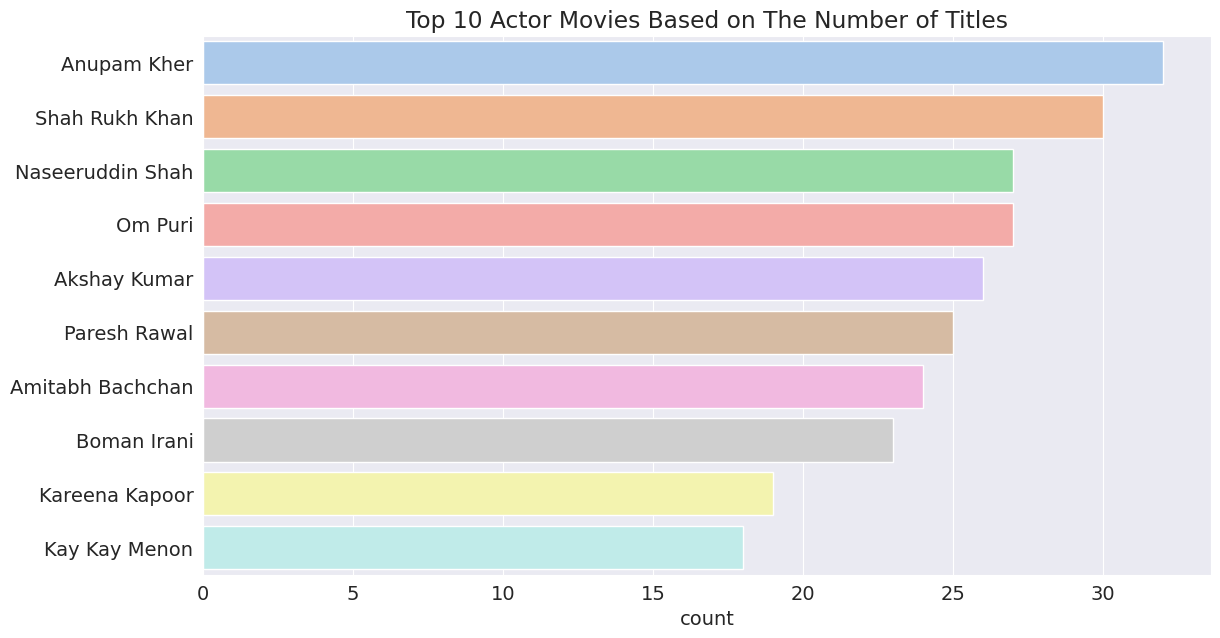

In [15]:
#7. Top Actor TV Shows on Netflix
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

#top actor movies
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai and on Netflix Movies, based on the number of titles, is Anupam Kher.

**By Analysing the Netflix Titles Data we can draw some conclusions**
*The most content type on Netflix is movies,  
*The popular streaming platform started gaining traction after 2014.
*Since then, the amount of content added has been increasing significantly,   
*The country by the amount of the produces content is the United States,
*The most popular director on Netflix , with the most titles, is JanSuter.   
*International Movies is a genre that is mostly in Netflix,
*The largest count of Netflix content is made with a “TV-14” rating,